# Model Building

## Imports and Installs

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [41]:
# Define the path to the file
file_path = r"C:\Users\aariz\Documents\AUS\Semester 8\COE 444\Project\Dataset\Final\Processed_Dataset1.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [42]:
df.shape

(8775013, 47)

In [43]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
0,138.2,7.1,83.1,39123.054540,39123.054540,0.0,0.0,0.0,0.0,0.5,...,99.0,1.694703e+08,5.5,15.954786,82.751168,3899.571692,0.9,38.5,Benign,Benign
1,86.0,4.2,44.8,72928.095973,72928.095973,0.0,0.0,0.0,0.0,0.3,...,64.4,1.694703e+08,13.5,13.405243,63.022662,1993.712535,1.0,244.6,Benign,Benign
2,171.4,4.1,32.0,52552.111857,52552.111857,0.0,0.0,0.0,0.0,0.2,...,152.1,9.108920e-02,5.5,14.407632,209.990584,42487.982728,0.9,38.5,Benign,Benign
3,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604610,1.0,244.6,Benign,Benign
4,347.6,7.1,64.0,6263.156480,6263.156480,0.0,0.0,0.0,0.0,0.5,...,162.5,9.976871e-02,5.5,15.169114,164.378795,30786.754580,0.9,38.5,Benign,Benign


In [44]:
df.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
8775008,9239255.500,17.0,64.0,179.848711,179.848711,0.0,0.0,0.0,0.0,0.0,...,841.300000,3.551102e-03,5.5,47.725866,234.290907,71887.233230,0.400000,38.500000,ARP Spoofing,Spoofing
8775009,7394141.600,17.0,64.0,179.835432,179.835432,0.0,0.0,0.0,0.0,0.0,...,174.000000,1.694024e+08,13.5,35.406877,722.481741,261080.788500,1.000000,244.600000,ARP Spoofing,Spoofing
8775010,9244144.300,17.0,64.0,179.817936,179.817936,0.0,0.0,0.0,0.0,0.0,...,155.600000,6.567001e-03,5.5,16.870446,66.489690,2760.536111,0.900000,38.500000,ARP Spoofing,Spoofing
8775011,9245943.800,17.0,64.0,179.787417,179.787417,0.0,0.0,0.0,0.0,0.0,...,195.700000,1.694024e+08,13.5,18.379019,87.360431,3816.028882,1.000000,244.600000,ARP Spoofing,Spoofing
8775012,9247477.333,17.0,64.0,179.763126,179.763126,0.0,0.0,0.0,0.0,0.0,...,508.666667,9.183963e-03,2.0,21.508466,258.633119,80933.935190,0.666667,4.666667,ARP Spoofing,Spoofing


In [45]:
# Check for missing values in the entire DataFrame
print("Missing values in each column:\n", df.isnull().sum())

# Check for any missing value in the entire DataFrame
print("Any missing value in the DataFrame:", df.isnull().values.any())

Missing values in each column:
 Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
Attack             0
Ca

In [46]:
# Initialize the label encoders for each categorical column
label_encoder_attack = LabelEncoder()
label_encoder_category = LabelEncoder()

# Fit the label encoders and transform the categorical columns to integers
df['Attack'] = label_encoder_attack.fit_transform(df['Attack'])
df['Category'] = label_encoder_category.fit_transform(df['Category'])


In [47]:
attack_mappings = {index: label for index, label in enumerate(label_encoder_attack.classes_)}
print('Attack Mappings:', attack_mappings)

# Getting the class mappings for 'Category'
category_mappings = {index: label for index, label in enumerate(label_encoder_category.classes_)}
print('Category Mappings:', category_mappings)

Attack Mappings: {0: 'ARP Spoofing', 1: 'Benign', 2: 'DDoS-Connect-Flood', 3: 'DDoS-ICMP', 4: 'DDoS-Publish-Flood', 5: 'DDoS-SYN', 6: 'DDoS-TCP', 7: 'DDoS-UDP', 8: 'DoS-Connect-Flood', 9: 'DoS-ICMP', 10: 'DoS-Publish-Flood', 11: 'DoS-SYN', 12: 'DoS-TCP', 13: 'DoS-UDP', 14: 'Malformed-Data', 15: 'OS-Scan', 16: 'Ping-Sweep', 17: 'Port-Scan', 18: 'VulScan'}
Category Mappings: {0: 'Benign', 1: 'DDoS', 2: 'DoS', 3: 'MQTT', 4: 'Recon', 5: 'Spoofing'}


In [48]:
# Generate summary statistics for the DataFrame
summary_statistics = df.describe()

# Include 'object' columns in the summary statistics (categorical columns)
summary_statistics_including_objects = df.describe(include='all')

print("Summary Statistics:\n", summary_statistics)
print("\nSummary Statistics Including Categorical Columns:\n", summary_statistics_including_objects)


Summary Statistics:
        Header_Length  Protocol Type      Duration          Rate         Srate  \
count   8.775013e+06   8.775013e+06  8.775013e+06  8.775013e+06  8.775013e+06   
mean    2.996247e+04   8.047203e+00  6.463691e+01  1.574449e+04  1.574449e+04   
std     2.823634e+05   6.304832e+00  7.853066e+00  4.000855e+04  4.000855e+04   
min     0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.170000e+00   1.050000e+00  6.400000e+01  6.422731e+00  6.422731e+00   
50%     1.080000e+02   6.000000e+00  6.400000e+01  1.331419e+02  1.331419e+02   
75%     1.942100e+04   1.700000e+01  6.400000e+01  1.975920e+04  1.975920e+04   
max     9.896704e+06   1.700000e+01  2.550000e+02  2.097152e+06  2.097152e+06   

           Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
count  8775013.0     8.775013e+06     8.775013e+06     8.775013e+06   
mean         0.0     5.123298e-03     1.572115e-01     3.951838e-02   
std          0.0     3.415862e-02   

In [49]:

# Selecting columns to scale (all columns except 'Attack' and 'Category')
columns_to_scale = df.columns.difference(['Attack', 'Category'])

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming it
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now, df has scaled features for all columns except 'Attack' and 'Category'



In [50]:
df.head(10)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
0,0.000014,0.417647,0.325882,1.865533e-02,1.865533e-02,0.0,0.0,0.0,0.0,0.5,...,0.038723,9.999968e-01,0.321429,0.148045,0.081110,0.007493,0.9,0.153941,1,0
1,0.000009,0.247059,0.175686,3.477483e-02,3.477483e-02,0.0,0.0,0.0,0.0,0.3,...,0.015217,9.999968e-01,0.892857,0.092453,0.061773,0.003831,1.0,1.000000,1,0
2,0.000017,0.241176,0.125490,2.505880e-02,2.505880e-02,0.0,0.0,0.0,0.0,0.2,...,0.074796,8.102576e-09,0.321429,0.114310,0.205826,0.081639,0.9,0.153941,1,0
3,0.000023,0.352941,0.250980,1.168373e-02,1.168373e-02,0.0,0.0,0.0,0.0,0.5,...,0.025951,9.999968e-01,0.892857,0.148745,0.298283,0.089653,1.0,1.000000,1,0
4,0.000035,0.417647,0.250980,2.986506e-03,2.986506e-03,0.0,0.0,0.0,0.0,0.5,...,0.081861,8.153792e-09,0.321429,0.130913,0.161119,0.059155,0.9,0.153941,1,0
5,0.000042,0.352941,0.250980,1.336756e-06,1.336756e-06,0.0,0.0,0.0,0.0,0.5,...,0.026291,9.999968e-01,0.892857,0.157651,0.295204,0.087792,1.0,1.000000,1,0
6,0.000047,0.352941,0.250980,1.068191e-02,1.068191e-02,0.0,0.0,0.0,0.0,0.5,...,0.026359,8.156487e-09,0.321429,0.067822,0.015005,0.000263,0.9,0.153941,1,0
7,0.000064,0.352941,0.250980,1.092751e-06,1.092751e-06,0.0,0.0,0.0,0.0,0.5,...,0.024592,9.999968e-01,0.892857,0.074283,0.021929,0.000482,1.0,1.000000,1,0
8,0.000062,0.352941,0.250980,9.179035e-07,9.179035e-07,0.0,0.0,0.0,0.0,0.5,...,0.024660,7.565952e-09,0.321429,0.074218,0.021783,0.000540,0.9,0.153941,1,0
9,0.000076,0.482353,0.325882,1.020575e-06,1.020575e-06,0.0,0.0,0.0,0.0,0.4,...,0.043614,9.999968e-01,0.892857,0.097957,0.065306,0.004534,1.0,1.000000,1,0


In [51]:
X = df.drop(columns=['Attack', 'Category'])
y = df['Category']

# Splitting the dataset into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

## Random Forest

In [52]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)


In [53]:
print('Random Forest F1 Score:', f1_score(y_test, y_pred, average='weighted'))

# Assuming y_test and y_pred are the true and predicted labels from your model
print(classification_report(y_test, y_pred, digits=3))


Random Forest F1 Score: 0.999020103630051
              precision    recall  f1-score   support

           0      0.979     0.995     0.987     69089
           1      1.000     1.000     1.000   1754902
           2      1.000     1.000     1.000    665870
           3      0.999     0.997     0.998     97983
           4      0.993     0.979     0.986     39489
           5      0.929     0.851     0.888      5171

    accuracy                          0.999   2632504
   macro avg      0.983     0.970     0.976   2632504
weighted avg      0.999     0.999     0.999   2632504



In [54]:
from joblib import dump

# Assume 'rf_model' is your trained Random Forest model
dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

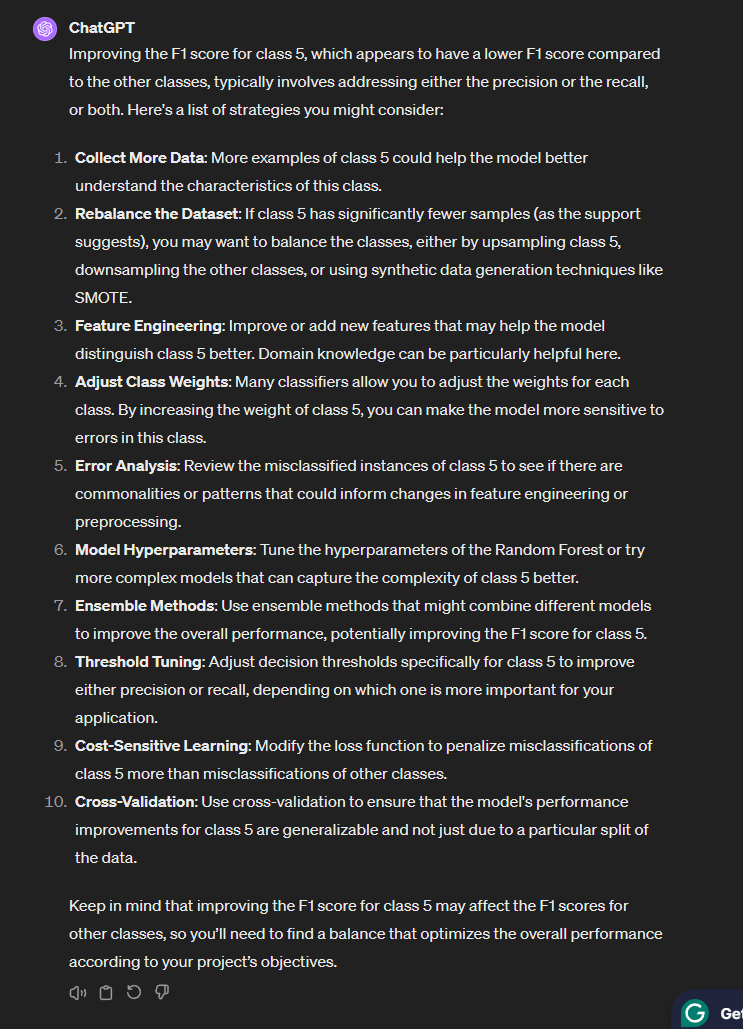